le chargement et le prétraitement du DataSet

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

Diabites = pd.read_csv("diabetes.csv")
Diabites.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Statistiques et informations sur le DataSet

In [52]:
Diabites.info()
Diabites.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


les valeurs manqauntes

In [55]:
Diabites.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

remplacement des valeurs manquantes par la moyenne 


In [58]:
#remplacement des valeurs manquantes par la moyenne 
colZerosNV=["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]
for col in colZerosNV:
    non_zero_mean = Diabites[Diabites[col] != 0][col].mean()
    Diabites[col] = Diabites[col].replace(0, non_zero_mean)
    
Diabites.head(15)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.000000,148.0,72.000000,35.00000,155.548223,33.600000,0.627,50,1
1,1.000000,85.0,66.000000,29.00000,155.548223,26.600000,0.351,31,0
2,8.000000,183.0,64.000000,29.15342,155.548223,23.300000,0.672,32,1
3,1.000000,89.0,66.000000,23.00000,94.000000,28.100000,0.167,21,0
4,4.494673,137.0,40.000000,35.00000,168.000000,43.100000,2.288,33,1
5,5.000000,116.0,74.000000,29.15342,155.548223,25.600000,0.201,30,0
6,3.000000,78.0,50.000000,32.00000,88.000000,31.000000,0.248,26,1
7,10.000000,115.0,72.405184,29.15342,155.548223,35.300000,0.134,29,0
8,2.000000,197.0,70.000000,45.00000,543.000000,30.500000,0.158,53,1
9,8.000000,125.0,96.000000,29.15342,155.548223,32.457464,0.232,54,1


Nombre de personnes diabèthiques et non diabèthiques

In [61]:
nbr_PersonnesDiab = Diabites[Diabites['Outcome'] == 1]['Outcome'].count()
#nbr_PersonnesNonDiab = Diabithes[Diabithes['Outcome'] == 0]['Outcome'].count()
print(f"Nombre de personnes diabèthiques dans le dataSet est: {nbr_PersonnesDiab}")
print(f"Nombre de personnes non diabèthiques dans le dataSet est: {768-nbr_PersonnesDiab}")

Nombre de personnes diabèthiques dans le dataSet est: 268
Nombre de personnes non diabèthiques dans le dataSet est: 500


Standardisation et Division de DataSet avec stratification

In [89]:
X = data.drop("Outcome", axis=1).values
y = data["Outcome"].values.reshape(-1, 1)
assert X.shape[0] == y.shape[0], "Number of samples in X and y must match"
assert X.shape[1] == 8, "Expected 8 features in input data"

X_standardized = (X - X.mean()) / X.std()
X=X_standardized

X = (X - X.mean(axis=0)) / X.std(axis=0)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42)
assert X_train.shape[0] + X_val.shape[0] + X_test.shape[0] == X.shape[0], "Train-val-test split sizes must sum to total samples"
                                                  


 Fonction d'activation ReLU et Sigmoide

In [92]:
# Fonction d'activation ReLU
def Relu(z):
    return np.maximum(0, z)

# Dérivée de la fonction d'activation ReLU
def relu_derivative(z):
    resultat = (z > 0).astype(z.dtype)
    assert np.all((resultat == 0) | (resultat == 1)), "resultat doit être 0 ou 1"
    return resultat

def sigmiode(z):
    assert isinstance(z, (int, float, list, np.ndarray)), "l'entrée doit être un nombre, une liste ou un tableau numpy"
    resultat = 1 / (1 + np.exp(-z))
    return resultat

def sigmiode_derivative(z):
    assert isinstance(z, (int, float, list, np.ndarray)), "L'entrée doit être un nombre, une liste ou un tableau numpy."
    result = sigmiode(z) * (1 - sigmiode(z))
    assert np.all((result >= 0) & (result <= 0.25)), "resultat doit être dans l'intervalle [0, 0.25]"
    return result


Classe NeuralNetwork

In [95]:
class NeuralNetwork:
    def __init__(self, layer_sizes, learning_rate=0.01):
        assert isinstance(layer_sizes, list) and len(layer_sizes) >= 2, "layer_sizes must be a list with at least 2 elements"
        assert all(isinstance(size, int) and size > 0 for size in layer_sizes), "All layer sizes must be positive integers"
        assert isinstance(learning_rate, (int, float)) and learning_rate > 0, "Learning rate must be a positive number"

        self.layer_sizes = layer_sizes
        self.learning_rate = learning_rate
        self.weights = []
        self.biases = []

        np.random.seed(42)
        for i in range(len(layer_sizes) - 1):
            w = np.random.randn(layer_sizes[i], layer_sizes[i + 1]) * np.sqrt(2 / layer_sizes[i])
            b = np.zeros((1, layer_sizes[i + 1]))
            assert w.shape == (layer_sizes[i], layer_sizes[i + 1]), f"Weight matrix {i+1} has incorrect shape"
            assert b.shape == (1, layer_sizes[i + 1]), f"Bias vector {i+1} has incorrect shape"
            self.weights.append(w)
            self.biases.append(b)

    def forward(self, X):
        assert isinstance(X, np.ndarray), "Input X must be a numpy array"
        assert X.shape[1] == self.layer_sizes[0], f"Input dimension ({X.shape[1]}) must match input layer size ({self.layer_sizes[0]})"
        self.activations = [X]
        self.z_values = []
        for i in range(len(self.weights) - 1):
            z = np.dot(self.activations[i], self.weights[i]) + self.biases[i]
            assert z.shape == (X.shape[0], self.layer_sizes[i + 1]), f"Z^{i+1} has incorrect shape"
            A = Relu(z)
            self.activations.append(A)
            self.z_values.append(z)
        z = np.dot(self.activations[-1], self.weights[-1]) + self.biases[-1]
        output = sigmiode(z)
        self.z_values.append(z)
        self.activations.append(output)
        return output

    def compute_loss(self, y_true, y_pred):
        assert isinstance(y_true, np.ndarray) and isinstance(y_pred, np.ndarray), "Inputs to loss must be numpy arrays"
        assert y_true.shape == y_pred.shape, "y_true and y_pred must have the same shape"
        assert np.all((y_true == 0) | (y_true == 1)), "y_true must contain only 0s and 1s"
        m = y_true.shape[0]
        loss = -(1 / m) * np.sum(y_true * np.log(y_pred + 1e-15) + (1 - y_true) * np.log(1 - y_pred + 1e-15))
        assert not np.isnan(loss), "Loss computation resulted in NaN"
        return loss

    def compute_accuracy(self, y_true, y_pred):
        assert isinstance(y_true, np.ndarray) and isinstance(y_pred, np.ndarray), "Inputs to accuracy must be numpy arrays"
        assert y_true.shape == y_pred.shape, "y_true and y_pred must have the same shape"
        preds = (y_pred >= 0.5).astype(int)
        accuracy = np.mean(preds == y_true)
        assert 0 <= accuracy <= 1, "Accuracy must be between 0 and 1"
        return accuracy

    def backward(self, X, y, outputs):
        assert isinstance(X, np.ndarray) and isinstance(y, np.ndarray) and isinstance(outputs, np.ndarray), "Inputs to backward must be numpy arrays"
        assert X.shape[1] == self.layer_sizes[0], f"Input dimension ({X.shape[1]}) must match input layer size ({self.layer_sizes[0]})"
        assert y.shape == outputs.shape, "y and outputs must have the same shape"
        m = X.shape[0]
        self.d_weights = [np.zeros_like(w) for w in self.weights]
        self.d_biases = [np.zeros_like(b) for b in self.biases]
        dZ = outputs - y
        assert dZ.shape == outputs.shape, "dZ for output layer has incorrect shape"
        self.d_weights[-1] = self.activations[-2].T @ dZ / m
        self.d_biases[-1] = np.sum(dZ, axis=0, keepdims=True) / m
        for i in range(len(self.weights) - 2, -1, -1):
            dA = dZ @ self.weights[i + 1].T
            dZ = dA * relu_derivative(self.z_values[i])
            self.d_weights[i] = self.activations[i].T @ dZ / m
            self.d_biases[i] = np.sum(dZ, axis=0, keepdims=True) / m
        for i in range(len(self.weights)):
            self.weights[i] = self.weights[i] - self.learning_rate * self.d_weights[i]
            self.biases[i] = self.biases[i] - self.learning_rate * self.d_biases[i]

    def train(self, X, y, X_val, y_val, epochs, batch_size):
        assert isinstance(X, np.ndarray) and isinstance(y, np.ndarray), "X and y must be numpy arrays"
        assert isinstance(X_val, np.ndarray) and isinstance(y_val, np.ndarray), "X_val and y_val must be numpy arrays"
        assert X.shape[1] == self.layer_sizes[0], f"Input dimension ({X.shape[1]}) must match input layer size ({self.layer_sizes[0]})"
        assert y.shape[1] == self.layer_sizes[-1], f"Output dimension ({y.shape[1]}) must match output layer size ({self.layer_sizes[-1]})"
        assert X_val.shape[1] == self.layer_sizes[0], f"Validation input dimension ({X_val.shape[1]}) must match input layer size ({self.layer_sizes[0]})"
        assert y_val.shape[1] == self.layer_sizes[-1], f"Validation output dimension ({y_val.shape[1]}) must match output layer size ({self.layer_sizes[-1]})"
        assert isinstance(epochs, int) and epochs > 0, "Epochs must be a positive integer"
        assert isinstance(batch_size, int) and batch_size > 0, "Batch size must be a positive integer"
        train_losses, val_losses, train_accuracies, val_accuracies = [], [], [], []

        for epoch in range(epochs):
            indices = np.random.permutation(X.shape[0])
            X, y = X[indices], y[indices]
            epoch_loss = 0
            for i in range(0, X.shape[0], batch_size):
                X_batch = X[i:i + batch_size]
                y_batch = y[i:i + batch_size]
                outputs = self.forward(X_batch)
                epoch_loss += self.compute_loss(y_batch, outputs)
                self.backward(X_batch, y_batch, outputs)
            y_train_pred = self.forward(X)
            y_val_pred = self.forward(X_val)
            train_loss = self.compute_loss(y, y_train_pred)
            val_loss = self.compute_loss(y_val, y_val_pred)
            train_accuracy = self.compute_accuracy(y, y_train_pred)
            val_accuracy = self.compute_accuracy(y_val, y_val_pred)
            train_losses.append(train_loss)
            val_losses.append(val_loss)
            train_accuracies.append(train_accuracy)
            val_accuracies.append(val_accuracy)
            if epoch % 10 == 0:
                print(f"Epoch {epoch}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Train Acc: {train_accuracy:.4f}, Val Acc: {val_accuracy:.4f}")
        return train_losses, val_losses, train_accuracies, val_accuracies

    def predict(self, X):
        assert isinstance(X, np.ndarray), "Input X must be a numpy array"
        assert X.shape[1] == self.layer_sizes[0], f"Input dimension ({X.shape[1]}) must match input layer size ({self.layer_sizes[0]})"
        output = self.forward(X)
        predictions = (output >= 0.5).astype(int)
        assert predictions.shape == (X.shape[0], self.layer_sizes[-1]), "Predictions have incorrect shape"
        return predictions



Epoch 0, Train Loss: 0.7750, Val Loss: 0.8183, Train Acc: 0.5696, Val Acc: 0.5260
Epoch 10, Train Loss: 0.6423, Val Loss: 0.6728, Train Acc: 0.6826, Val Acc: 0.6299
Epoch 20, Train Loss: 0.5917, Val Loss: 0.6149, Train Acc: 0.7217, Val Acc: 0.6948
Epoch 30, Train Loss: 0.5590, Val Loss: 0.5782, Train Acc: 0.7370, Val Acc: 0.6948
Epoch 40, Train Loss: 0.5360, Val Loss: 0.5519, Train Acc: 0.7435, Val Acc: 0.7078
Epoch 50, Train Loss: 0.5208, Val Loss: 0.5347, Train Acc: 0.7565, Val Acc: 0.7273
Epoch 60, Train Loss: 0.5092, Val Loss: 0.5210, Train Acc: 0.7652, Val Acc: 0.7273
Epoch 70, Train Loss: 0.5006, Val Loss: 0.5116, Train Acc: 0.7696, Val Acc: 0.7338
Epoch 80, Train Loss: 0.4927, Val Loss: 0.5047, Train Acc: 0.7717, Val Acc: 0.7468
Epoch 90, Train Loss: 0.4858, Val Loss: 0.4996, Train Acc: 0.7804, Val Acc: 0.7468

Rapport de classification (Test set) :
              precision    recall  f1-score   support

           0       0.74      0.81      0.77       100
           1       0.5

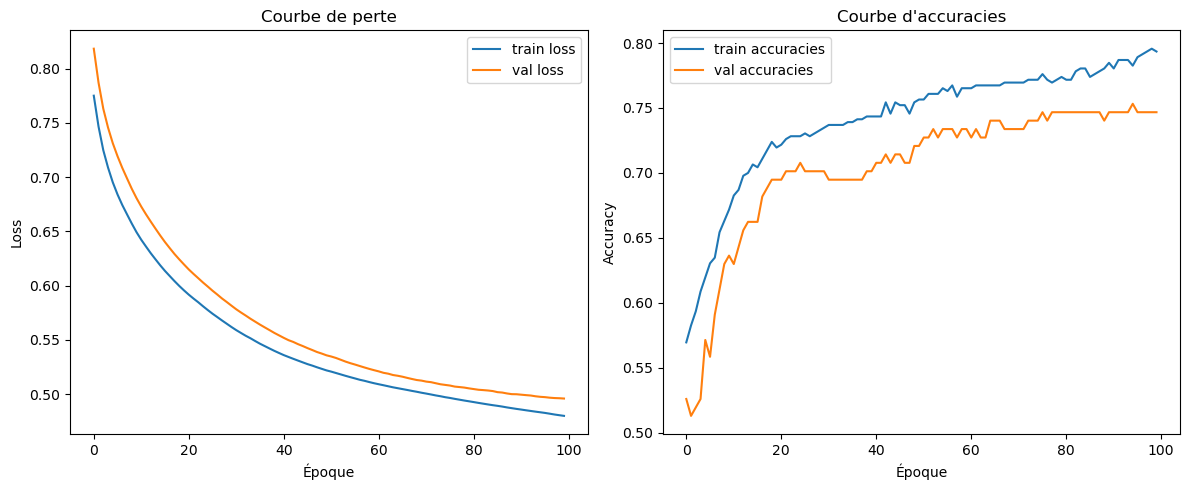

In [97]:




# Création et entraînement du modèle
layer_sizes = [8, 16, 8, 1]
nn = NeuralNetwork(layer_sizes, learning_rate=0.01)
train_losses, val_losses, train_accuracies, val_accuracies = nn.train(X_train, y_train, X_val, y_val, epochs=100, batch_size=32)

# Prédictions et évaluation
y_pred = nn.predict(X_test)
print("\nRapport de classification (Test set) :")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("Matrice de confusion")
print(cm)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label="train loss")
plt.plot(val_losses, label="val loss")
plt.title("Courbe de perte")
plt.xlabel("Époque")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label="train accuracies")
plt.plot(val_accuracies, label="val accuracies")
plt.title("Courbe d'accuracies")
plt.xlabel("Époque")
plt.ylabel("Accuracy")
plt.legend()
plt.tight_layout()
plt.show()
